### Reading the dataset

In [1]:
import numpy as np

In [2]:
f1 = open("dataset3/german.data-numeric")

### Removing the unwanted lines

In [3]:
line = f1.readline()

In [4]:
print(line)

   1   6   4  12   5   5   3   4   1  67   3   2   1   2   1   0   0   1   0   0   1   0   0   1   1 



### Reading the actual dataset

In [5]:
dataset_tmp = []
dataset_tmp.append(line[:-1])

while line:
    line = f1.readline()
    
    if line == '':
        break
    
    dataset_tmp.append(line[:-1])

In [6]:
print(dataset_tmp[-1])

   2  45   4  46   2   1   3   4   3  27   3   1   1   1   1   0   1   1   0   0   1   0   0   1   1 


In [7]:
def custom_parser(text):
    
    k = []
    
    ftt = text[:-1].strip().split(" ")
    
    for i in ftt:
        if i!='':
            k.append(int(i))
    print(k)
    return k

In [8]:
print(len(dataset_tmp))

dataset = np.ndarray(shape=(1000,25))

for i in range(len(dataset_tmp)):
    asd = custom_parser(dataset_tmp[i])
    for j in range(len(asd)):
        dataset[i,j] = int(asd[j])
    
print(dataset.shape)

1000
[1, 6, 4, 12, 5, 5, 3, 4, 1, 67, 3, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1]
[2, 48, 2, 60, 1, 3, 2, 2, 1, 22, 3, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2]
[4, 12, 4, 21, 1, 4, 3, 3, 1, 49, 3, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1]
[1, 42, 2, 79, 1, 4, 3, 4, 2, 45, 3, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
[1, 24, 3, 49, 1, 3, 3, 4, 4, 53, 3, 2, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2]
[4, 36, 2, 91, 5, 3, 3, 4, 4, 35, 3, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]
[4, 24, 2, 28, 3, 5, 3, 4, 2, 53, 3, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1]
[2, 36, 2, 69, 1, 3, 3, 2, 3, 35, 3, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1]
[4, 12, 2, 31, 4, 4, 1, 4, 1, 61, 3, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1]
[2, 30, 4, 52, 1, 1, 4, 2, 3, 28, 3, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2]
[2, 12, 2, 13, 1, 2, 2, 1, 3, 25, 3, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2]
[1, 48, 2, 43, 1, 2, 2, 4, 2, 24, 3, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2]
[2, 12, 2, 16, 1, 3, 2, 1, 3, 22, 3, 1, 1, 2, 1,

In [9]:
dataset

array([[ 1.,  6.,  4., ...,  0.,  1.,  1.],
       [ 2., 48.,  2., ...,  0.,  1.,  2.],
       [ 4., 12.,  4., ...,  1.,  0.,  1.],
       ...,
       [ 4., 12.,  2., ...,  0.,  1.,  1.],
       [ 1., 45.,  2., ...,  0.,  1.,  2.],
       [ 2., 45.,  4., ...,  0.,  1.,  1.]])

In [10]:
dataset_np = dataset

In [11]:
# ! /home/rajat1/anaconda3/envs/col865/bin/pip install pandas

In [12]:
# ! /home/rajat1/anaconda3/envs/col865/bin/pip install numpy

In [13]:
import pandas as pd
import numpy as np

In [14]:
classes = list(set(dataset_np[:,24]))
classes

[1.0, 2.0]

In [15]:
dataset_without_id = dataset_np
classes_dic = {}

tmp = dataset_without_id[:,24]

for i in tmp:
    if i not in classes_dic.keys():
        classes_dic[i] = 1
    else:
        classes_dic[i]+=1

In [16]:
classes_dic

{1.0: 700, 2.0: 300}

dict_keys([1.0, 2.0])
dict_values([700, 300])


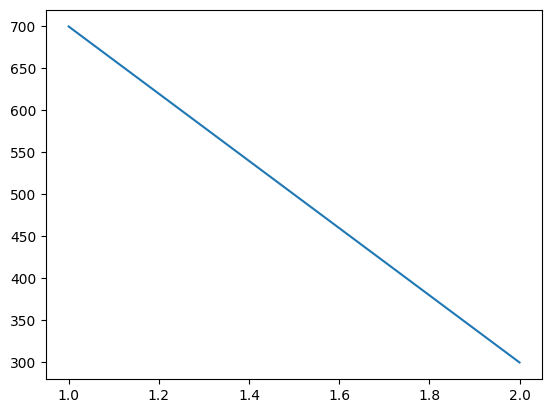

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x = classes_dic.keys()
y = classes_dic.values()

print(x)
print(y)

plt.plot(x, y)
plt.show()

In [18]:
train_per = 60
test_per = 100 - train_per
threshold = 5

In [19]:
classes_dic_data = {}

tmp = dataset_without_id[:,:]


for i in tmp:
    if i[24] not in classes_dic_data.keys():
        classes_dic_data[i[24]] = []
    
    classes_dic_data[i[24]].append(i)

In [20]:
for i in classes_dic_data.keys():
    print(i, len(classes_dic_data[i]))

1.0 700
2.0 300


In [21]:
import sklearn
import sklearn.model_selection

test = []
train = []


import random

for i in classes_dic_data.keys():
    
    print(i, len(classes_dic_data[i]))
    
    if len(classes_dic_data[i]) < threshold:
        
        for j in classes_dic_data[i]:
            train.append(j)
            
    else:

        train_t, test_t = sklearn.model_selection.train_test_split(classes_dic_data[i], shuffle=True, test_size = test_per/100)
        
        for j in train_t:
            train.append(j)
        
        for j in test_t:
            test.append(j)

1.0 700
2.0 300


In [22]:
print("Train",len(train))
print("Test",len(test)) 
print("Total", len(train)+len(test)) # 1578154

Train 600
Test 400
Total 1000


In [23]:
train = np.array(train)
test = np.array(test)

### 3.2 Dataset is preapared

In [24]:
train_X = np.delete(train,24,axis=1).astype("int32")
train_y = train[:,24].astype("int32")
test_X = np.delete(test,24,axis=1).astype("int32")
test_y = test[:,24].astype("int32")


In [25]:
# 1- good, 2- bad
# need to increase the weight of the bad

print(train_y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [26]:
train_X

array([[ 3, 36,  2, ...,  0,  0,  1],
       [ 1, 24,  2, ...,  0,  0,  0],
       [ 1, 10,  4, ...,  0,  1,  0],
       ...,
       [ 2, 48,  3, ...,  0,  0,  1],
       [ 1, 42,  2, ...,  0,  0,  1],
       [ 1, 18,  2, ...,  0,  0,  1]], dtype=int32)

## Running the model

### 1. training the model

In [27]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score

from scikit_obliquetree.HHCART import HouseHolderCART
from scikit_obliquetree.segmentor import MSE, MeanSegmentor

reg = BaggingRegressor(
    HouseHolderCART(MSE(), MeanSegmentor(), max_depth=3),
    n_estimators=10,
    n_jobs=-1,
)

In [28]:
reg.fit(train_X, train_y)

BaggingRegressor(base_estimator=HouseHolderCART(impurity=<scikit_obliquetree.segmentor.MSE object at 0x7fedf5d9bf50>,
                                                segmentor=<scikit_obliquetree.segmentor.MeanSegmentor object at 0x7fedf5db2090>),
                 n_jobs=-1)

In [29]:
print(reg.predict([test_X[0]]))
print(test_y[0])

[1.1]
1


### 2. testing the model

In [30]:
true_res = 0

res = reg.predict(test_X)

In [31]:
res

array([1.1, 1. , 1.2, 1.3, 1.1, 1.1, 1.2, 1.1, 1.4, 1.8, 1. , 1.3, 1. ,
       1.6, 1.2, 1. , 1.7, 1. , 1. , 1.2, 1. , 1.2, 1. , 1. , 1. , 1.7,
       1.2, 1. , 1.6, 1.3, 1.5, 1.3, 1.2, 1.4, 1.5, 1.1, 1.1, 1.2, 1. ,
       1.6, 1.3, 1. , 1. , 1.4, 1.5, 1.4, 1.1, 1.5, 1.3, 1.2, 1.3, 1. ,
       1.2, 1.3, 1.3, 1.2, 1.1, 1.7, 1. , 1.2, 1.2, 1.2, 1. , 1.1, 1.6,
       1. , 1.2, 1.7, 1.2, 1.1, 1. , 1.1, 1.4, 1. , 1.4, 1. , 1.1, 1.6,
       1.4, 1.1, 1.1, 1. , 1.1, 1. , 1.2, 1.5, 1.4, 1. , 1.7, 1.3, 1. ,
       1.2, 1.3, 1.5, 1. , 1.2, 1.5, 1. , 1.1, 1.1, 1.1, 1.2, 1. , 1.1,
       1.3, 1.3, 1.3, 1.1, 1.6, 1. , 1.4, 1. , 1. , 1.3, 1.5, 1.7, 1.1,
       1.7, 1.1, 1.5, 1.7, 1. , 1.2, 1.5, 1.3, 1. , 1.1, 1. , 1.1, 1.1,
       1.1, 1.4, 1. , 1.2, 1.4, 1.3, 1. , 1.3, 1.2, 1.4, 1. , 1. , 1.1,
       1.4, 1.3, 1.4, 1.1, 1.1, 1.6, 1. , 1.1, 1.5, 1.3, 1.2, 1.1, 1.7,
       1. , 1.2, 1. , 1.3, 1. , 1. , 1.1, 1.4, 1. , 1.3, 1.2, 1.2, 1.1,
       1.7, 1.2, 1.1, 1.3, 1.2, 1.1, 1.1, 1.1, 1.1, 1. , 1.1, 1.

In [32]:
res1 = []

for i in range(len(res)):
    res1.append((res[i]+0.5)//1)

In [33]:
res1

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [34]:
test_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [50]:
true_res=0

for i in range(res.shape[0]):
    if(int(res1[i]) == int(test_y[i])):
        true_res +=1

accuracy = true_res/test_X.shape[0]

print(accuracy)

0.725


In [51]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    
    
    #cm = np.log(cm+1)
    #cm = cm.astype("int32")
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5,5))
    #plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig("fig_d3_oblique.png")
    plt.show()

In [53]:
classes = range(4)

dic = {}
for i in range(4):
    dic[i] = i

print(dic)

cnf_array = []

for i in range(4):
    cnf_array.append([0]*4)
    
print(len(cnf_array))
print(len(cnf_array[0]))

# print(dic[test_y[0]])

for i in range(res.shape[0]):
#     print(test_y[i])
#     print(int(res1[i]))
#     print(dic[int(test_y[i])])
#     print(dic[int(res1[i])])
    
    cnf_array[dic[int(test_y[i])]][dic[int(res1[i])]] += 1

{0: 0, 1: 1, 2: 2, 3: 3}
4
4


In [54]:
print(cnf_array)

[[0, 0, 0, 0], [0, 233, 47, 0], [0, 63, 57, 0], [0, 0, 0, 0]]


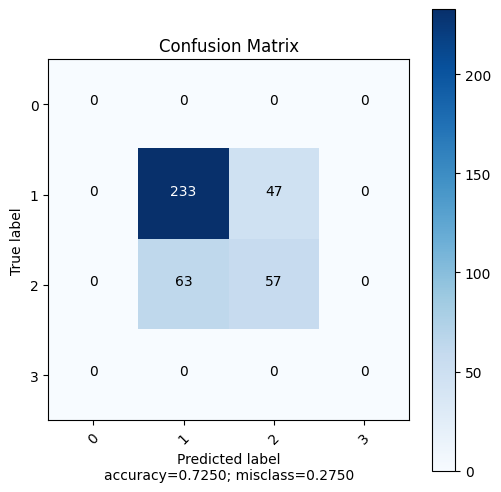

In [55]:
plot_confusion_matrix(cm= np.array(cnf_array), 
                      normalize    = False,
                      target_names = classes,
                      title        = "Confusion Matrix")